Single spillover (non-recurrent) branching process (infinite population), plots probabilities of outbreak.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sim import sim

In [3]:
#####################################################
# runs many simulations WITHOUT recurrent spillover #
#####################################################
#
# optional input N_sims is number of simulations to run.
#
# returns the percentage of those simulations that outbreak
#
#########################

def sim_percentage(beta_0, gamma_0, mu_1=0, mu_2=0, N_sims=1000):   
    N_outbreaks = 0  
    for i in range(N_sims):
        if sim(beta_0, gamma_0, mu_1, mu_2) == 1: N_outbreaks += 1
    return N_outbreaks/N_sims

In [4]:
# run a single simulation

#parameters
beta_0 = 0.09
gamma_0 = 0.1
mu_1 = 0.01
mu_2 = 0.01

sim(beta_0, gamma_0, mu_1, mu_2)

(0, 25.39847289873432)

In [32]:
# run a bulk simulation

#parameters
beta_0 = 0.09
gamma_0 = 0.1
mu_1=0.001
mu_2=0.001

sim_percentage(beta_0, gamma_0, mu_1, mu_2, N_sims=10000)

0.001

In [6]:
#################################################################
# for a fixed mu, plots the probability of outbreak against R_0 #
#################################################################
#
# input mu = mu_1 = mu_2
#
# optional inputs R0_min, R0_max give range of R_0 to plot over.
# optional input N_points gives number of points to plot.
# optional inputs N_sims gives number of simulations to run per point.
#
################################################################

def prob_plot(mu, R0_min=0.001, R0_max=2.5, N_points = 75, N_sims=750):
    
    # Take some evenly spaced R_0 values
    # Note that it does matter what beta and gamma are, even if they give the same R_0. 
    # But here we're just fixing gamma to be 0.1
    # TO DO later: explore other choices.
    beta_range = np.linspace(R0_min/10, R0_max/10, N_points); gamma = 0.1
    
    # initialize arrays to be plotted
    R0 = []; percent = []

    #simulate percentages of outbreak
    for beta in beta_range:
        R0 = np.append(R0, beta/gamma)
        percent = np.append(percent, sim_percentage(beta, gamma, mu, mu, N_sims))
        
    #make the plot
    plt.plot(R0, percent, "ob")
    #graph the actual probability of outbreak with no mutation
    #################################################################
    # From Linda's talk: the actual probability of outbreak with no mutation is:
    #                            0 if R_0 < 1
    #                            1-1/R_0 = 1-gamma/beta if R_0 > 1
    #################################################################
    plt.plot(R0, np.piecewise(R0, [R0<1, R0>=1], [0, lambda R0: 1-1/R0]), "r", label='probability without mutation')
    plt.title('mu1 = mu2 = {}'.format(mu))
    plt.xlabel("R_0"); plt.ylabel("p")
    plt.xlim(R0_min, R0_max)
    plt.legend()
    plt.show()

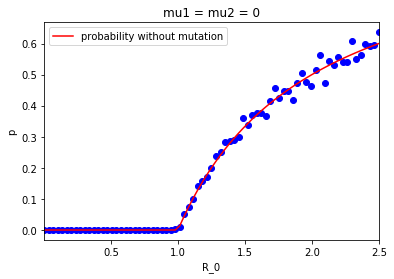

CPU times: user 1min 39s, sys: 1.05 s, total: 1min 40s
Wall time: 1min 51s


In [7]:
%%time

# SANITY CHECK
# When there is no mutation, check that our simulation agrees with the correct probability

prob_plot(mu=0)

Simulate some other values of mu. Note the scale changes on the axes

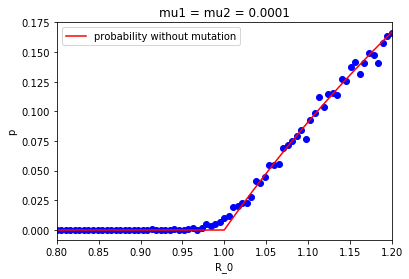

CPU times: user 4min 22s, sys: 2.62 s, total: 4min 24s
Wall time: 4min 42s


In [12]:
%%time

#zoom in
prob_plot(mu=0.0001, R0_min=0.8, R0_max=1.2, N_points = 75, N_sims=2000)

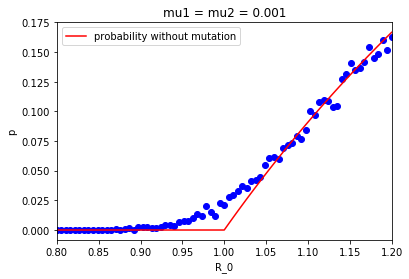

CPU times: user 3min 55s, sys: 2.19 s, total: 3min 57s
Wall time: 4min 11s


In [13]:
%%time

prob_plot(mu=0.001, R0_min=0.8, R0_max=1.2, N_points = 75, N_sims=2000)

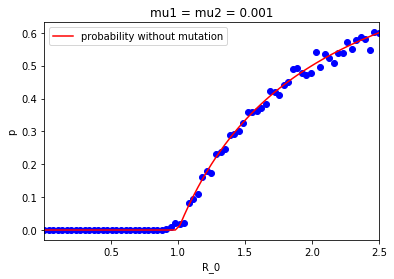

CPU times: user 1min 28s, sys: 639 ms, total: 1min 28s
Wall time: 1min 30s


In [14]:
%%time

#zoom back out
prob_plot(mu=0.001)

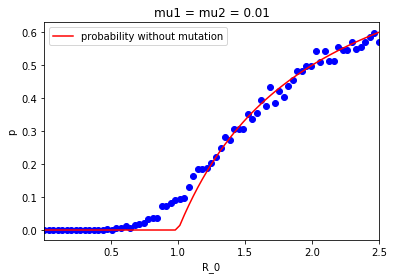

CPU times: user 1min 17s, sys: 628 ms, total: 1min 18s
Wall time: 1min 22s


In [15]:
%%time

prob_plot(mu=0.01)

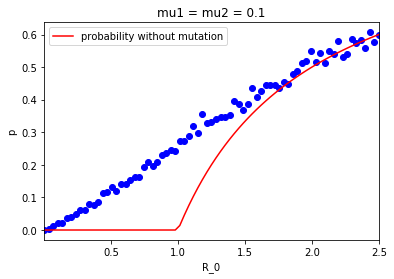

CPU times: user 45.4 s, sys: 543 ms, total: 45.9 s
Wall time: 49.2 s


In [16]:
%%time

prob_plot(mu=0.1)

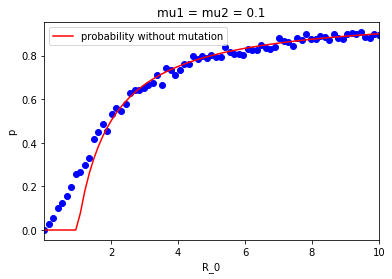

CPU times: user 1min 29s, sys: 927 ms, total: 1min 30s
Wall time: 1min 35s


In [17]:
%%time

#zoom out more
prob_plot(mu=0.1, R0_max=10)

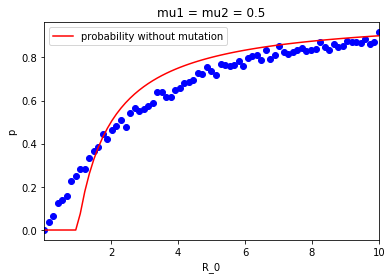

CPU times: user 1min 14s, sys: 1.2 s, total: 1min 15s
Wall time: 1min 14s


In [18]:
%%time

prob_plot(mu=0.5, R0_max=10)

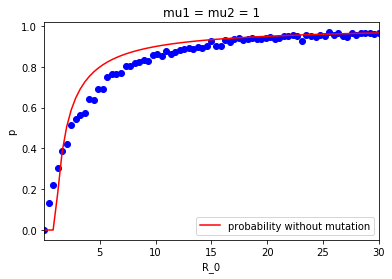

CPU times: user 1min 37s, sys: 1.25 s, total: 1min 38s
Wall time: 1min 39s


In [19]:
%%time

prob_plot(mu=1, R0_max=30)

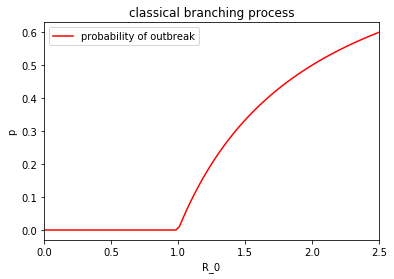

In [29]:
# initialize arrays to be plotted
R0 = np.linspace(0, 2.5, 100)

plt.plot(R0, np.piecewise(R0, [R0<1, R0>=1], [0, lambda R0: 1-1/R0]), "r", label='probability of outbreak')
plt.title('classical branching process')
plt.xlabel("R_0"); plt.ylabel("p")
plt.xlim(0, 2.5)
plt.legend()
plt.show()